<a href="https://colab.research.google.com/github/4nchez/Colab-Jupiter/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import theano
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
TensorFlow version :  2.3.0
Keras version :  2.4.3


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
label :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


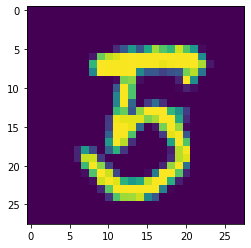

In [2]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
i=4600
plt.imshow(x_train[i].reshape(img_rows, img_cols), interpolation='nearest')
print("label : ", y_train[i,:])

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

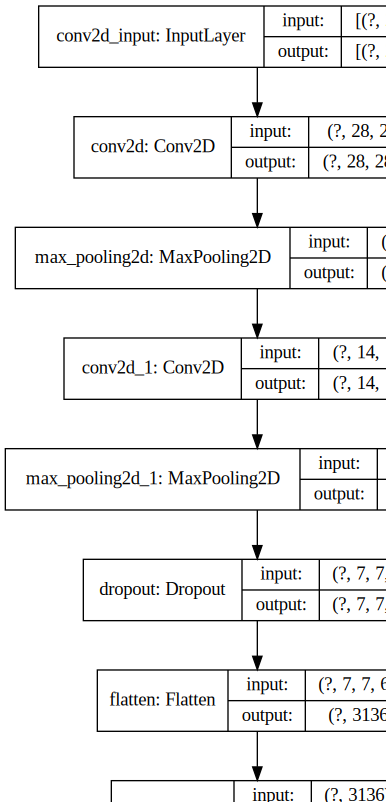

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1 
                #  validation_data=(x_test, y_test)
                 )

Epoch 1/12
469/469 [==============================] - 4s 8ms/step - loss: 0.1861 - accuracy: 0.9427
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0610 - accuracy: 0.9811
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0439 - accuracy: 0.9859
Epoch 4/12
469/469 [==============================] - 4s 7ms/step - loss: 0.0354 - accuracy: 0.9883
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0297 - accuracy: 0.9904
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0267 - accuracy: 0.9913
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 8/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0201 - accuracy: 0.9934
Epoch 9/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0190 - accuracy: 0.9940
Epoch 10/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0168 - accuracy: 0.9945

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(model.predict_classes(x_test[1:5]))
print(y_test[1:5])

Test loss: 0.020037781447172165
Test accuracy: 0.9932000041007996
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[2 1 0 4]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


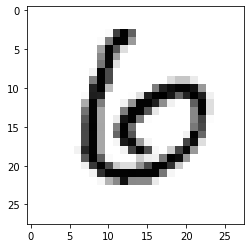

The Answer is  [6]


In [7]:
import matplotlib.pyplot as plt
n = 11
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))

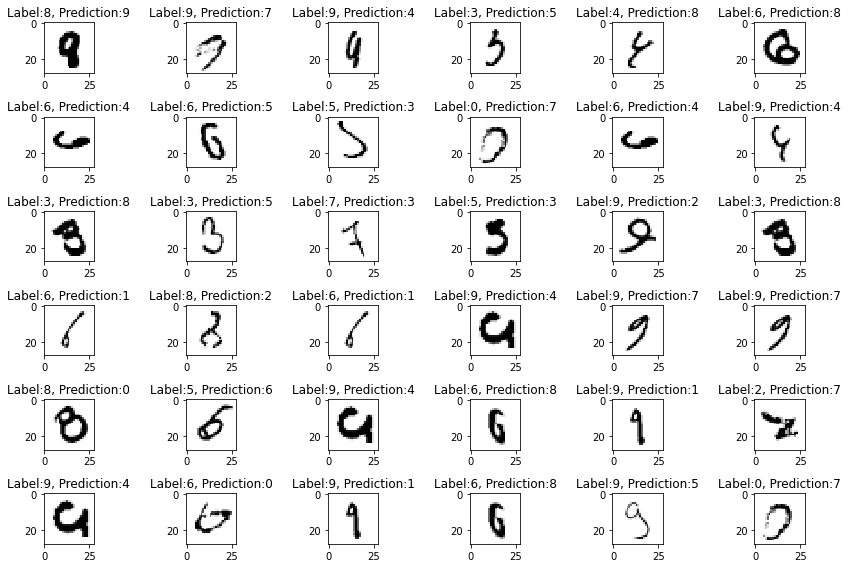

In [8]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=36)

count = 0
nrows = ncols = 6

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [9]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28, 1),
    'dtype': 'float32',
    'name': 'conv2d_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 28, 28, 1),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 32,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (5, 5),
    'name': 'conv2d',
    'padding': 'same',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'MaxPooling2D',
   'config': {'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'max_poolin

In [10]:
model.layers[0].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'batch_input_shape': (None, 28, 28, 1),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 32,
 'groups': 1,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (5, 5),
 'name': 'conv2d',
 'padding': 'same',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [11]:
model.count_params()

3156098

In [12]:
model.layers[0].count_params()

832

In [13]:
model.layers[1].count_params()

0

In [14]:
model.layers[2].count_params()

8256

In [15]:
model.get_weights()

[array([[[[ 1.36663085e-02, -7.20428973e-02, -1.38341356e-02,
            1.49453226e-02, -1.94238991e-01, -5.85416257e-02,
           -6.99342489e-02, -2.69674249e-02,  4.20863554e-02,
           -4.14351141e-03, -1.66250333e-01,  1.29336387e-01,
            7.29015842e-02, -2.22289130e-01,  1.67939272e-02,
            6.03243336e-02,  1.13446280e-01,  1.78794432e-02,
           -1.48763554e-02, -1.49347708e-01,  2.09465902e-02,
           -2.08037272e-02, -1.17978625e-01,  1.37022987e-01,
           -2.45481897e-02, -1.16687696e-02, -6.25362545e-02,
            1.83204964e-01, -6.76349327e-02,  5.22177527e-03,
           -3.47113647e-02, -1.09422021e-02]],
 
         [[-8.06028545e-02,  4.93272692e-02, -1.40108010e-02,
            5.07765561e-02, -1.80775836e-01,  9.47093964e-02,
           -1.51413195e-02, -6.00364171e-02,  6.59249425e-02,
            1.01800328e-02, -6.19009323e-02,  1.38039172e-01,
           -9.67510492e-02, -1.30162567e-01, -1.33544311e-01,
            9.1721974

In [31]:
model.layers[0].get_weights()

[array([[[[ 1.36663085e-02, -7.20428973e-02, -1.38341356e-02,
            1.49453226e-02, -1.94238991e-01, -5.85416257e-02,
           -6.99342489e-02, -2.69674249e-02,  4.20863554e-02,
           -4.14351141e-03, -1.66250333e-01,  1.29336387e-01,
            7.29015842e-02, -2.22289130e-01,  1.67939272e-02,
            6.03243336e-02,  1.13446280e-01,  1.78794432e-02,
           -1.48763554e-02, -1.49347708e-01,  2.09465902e-02,
           -2.08037272e-02, -1.17978625e-01,  1.37022987e-01,
           -2.45481897e-02, -1.16687696e-02, -6.25362545e-02,
            1.83204964e-01, -6.76349327e-02,  5.22177527e-03,
           -3.47113647e-02, -1.09422021e-02]],
 
         [[-8.06028545e-02,  4.93272692e-02, -1.40108010e-02,
            5.07765561e-02, -1.80775836e-01,  9.47093964e-02,
           -1.51413195e-02, -6.00364171e-02,  6.59249425e-02,
            1.01800328e-02, -6.19009323e-02,  1.38039172e-01,
           -9.67510492e-02, -1.30162567e-01, -1.33544311e-01,
            9.1721974

In [32]:
model.layers[0].get_weights()

[array([[[[ 1.36663085e-02, -7.20428973e-02, -1.38341356e-02,
            1.49453226e-02, -1.94238991e-01, -5.85416257e-02,
           -6.99342489e-02, -2.69674249e-02,  4.20863554e-02,
           -4.14351141e-03, -1.66250333e-01,  1.29336387e-01,
            7.29015842e-02, -2.22289130e-01,  1.67939272e-02,
            6.03243336e-02,  1.13446280e-01,  1.78794432e-02,
           -1.48763554e-02, -1.49347708e-01,  2.09465902e-02,
           -2.08037272e-02, -1.17978625e-01,  1.37022987e-01,
           -2.45481897e-02, -1.16687696e-02, -6.25362545e-02,
            1.83204964e-01, -6.76349327e-02,  5.22177527e-03,
           -3.47113647e-02, -1.09422021e-02]],
 
         [[-8.06028545e-02,  4.93272692e-02, -1.40108010e-02,
            5.07765561e-02, -1.80775836e-01,  9.47093964e-02,
           -1.51413195e-02, -6.00364171e-02,  6.59249425e-02,
            1.01800328e-02, -6.19009323e-02,  1.38039172e-01,
           -9.67510492e-02, -1.30162567e-01, -1.33544311e-01,
            9.1721974

https://www.youtube.com/watch?v=5tW3y7lm7V0

In [ ]:
def plot_filters(layer, x, y):
  filters = layer.get_weights()
  fig = plt.figure()
  for j in range(len(filters)):
    ax = fig.add_subplot(y, x, j+1)
    ax.matshow(filters[j][0], cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
  plt.tight_layout()
  return plt
plot_filters(model.layers[0], 8, 4)

(1, 28, 28, 1)


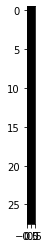

In [41]:
from keras import backend as K
output_layer = model.layers[3].output
output_fn = K.function([model.layers[0].input],output_layer)
# input_image = x_train.reshape(x_train.shape[0],1, img_rows, img_cols)[0:1,:,:,:]
input_image = x_train[0:1,:,:,:]
print(input_image.shape)
plt.imshow(input_image[0,0,:,:],cmap = 'gray')

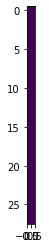

In [42]:
plt.imshow(input_image[0,0,:,:])

In [43]:
output_image = output_fn(input_image)
print(output_image.shape)
output_image = np.rollaxis(np.rollaxis(output_image, 3,1),3,1)
print(output_image.shape)

(1, 7, 7, 64)
(1, 7, 64, 7)


IndexError: ignored

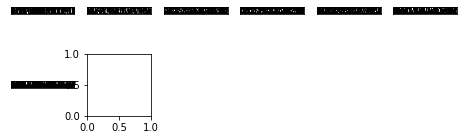

In [44]:
fig=plt.figure(figsize=(8,8))
for i in range(32):
  ax = fig.add_subplot(6,6, i+1)
  ax.imshow(output_image[0,:,:,i],cmap=matplotlib.cm.gray)
  plt.xticks(np.array([]))
  plt.yticks(np.array([]))
  plt.tight_layout
plt